In [1]:
import pandas as pd

# 1. Reading the file

In [3]:
df = pd.read_csv("/Users/deblinamandal/Downloads/data22.csv")

In [4]:
df.head()

,CustomerID,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,CUS1,25,5,Rural,Male
1,CUS2,30,10,Urban,Male
2,CUS3,25,8,Rural,Female
3,CUS4,35,15,Rural,Female
4,CUS5,45,20,Urban,Female


# 2. Checking dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   CustomerID                         8 non-null      object
 1   Age                                8 non-null      int64 
 2   Income (INR) (in lakhs per annum)  8 non-null      int64 
 3   Demography                         8 non-null      object
 4   Gender                             8 non-null      object
dtypes: int64(2), object(3)
memory usage: 452.0+ bytes


In [6]:
df.isna().sum()

CustomerID                           0
Age                                  0
Income (INR) (in lakhs per annum)    0
Demography                           0
Gender                               0
dtype: int64

DROPPPING CUSTOMER ID COLUMN

In [7]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [8]:
df.head()

,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,25,5,Rural,Male
1,30,10,Urban,Male
2,25,8,Rural,Female
3,35,15,Rural,Female
4,45,20,Urban,Female


# 3. Enlabel Gender and Demogrphy as 0 and 1 as per the question

In [9]:
from sklearn.preprocessing import LabelEncoder
# Define a mapping dictionary for unit labels
unit_mapping = {'Male': 0, 'Female': 1}
unit_mapping1 = {'Rural': 0, 'Urban': 1}
# Suppose 'unit_column' is the column where you want to assign integer labels
df['Gender'] = df['Gender'].map(unit_mapping)
df['Demography'] = df['Demography'].map(unit_mapping1)


In [10]:
df.head()

,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,25,5,0,0
1,30,10,1,0
2,25,8,0,1
3,35,15,0,1
4,45,20,1,1


# 4. Standard scaling for Age and Income 

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['Age']=sc.fit_transform(df[['Age']])
df['Income (INR) (in lakhs per annum)']=sc.fit_transform(df[['Income (INR) (in lakhs per annum)']])
df.head()

,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,-0.840900,-1.166880,0,0
1,-0.323423,-0.286216,1,0
2,-0.840900,-0.638482,0,1
3,0.194054,0.594448,0,1
4,1.229008,1.475113,1,1


# 5. Performing K means clustering 

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(df)


In [14]:
clusters

array([0, 0, 0, 1, 1, 0, 1, 0], dtype=int32)

In [15]:
df["Cluster"] = clusters
df.head(8)

,Age,Income (INR) (in lakhs per annum),Demography,Gender,Cluster
0,-0.840900,-1.166880,0,0,0
1,-0.323423,-0.286216,1,0,0
2,-0.840900,-0.638482,0,1,0
3,0.194054,0.594448,0,1,1
4,1.229008,1.475113,1,1,1
5,-1.358377,-1.166880,1,0,0
6,1.746485,1.475113,1,0,1
7,0.194054,-0.286216,0,0,0


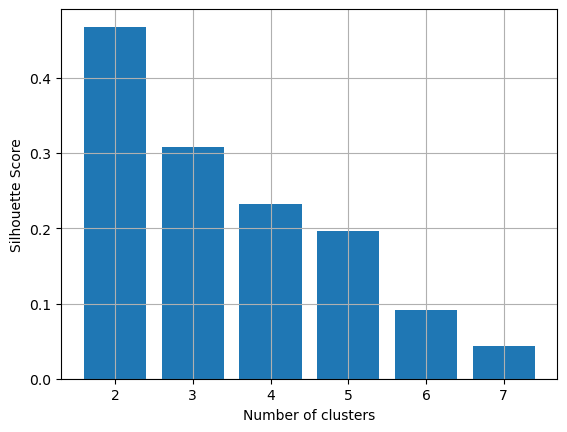

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2,8):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 


# 6. Calculating K mean performance using silhouette score and Intertia

In [17]:
silhouette_avg = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.46802832889800017


A score of 0.468 suggests a reasonable separation between clusters.
Silhouette scores range from -1 to 1. A higher score indicates better-defined clusters, and 0.468 is generally considered a good score.

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 7.274273765507841


The inertia value of 7.274 suggests that the clusters are relatively compact. 

# 7. Plotting the Clustering on basis of Age and Income

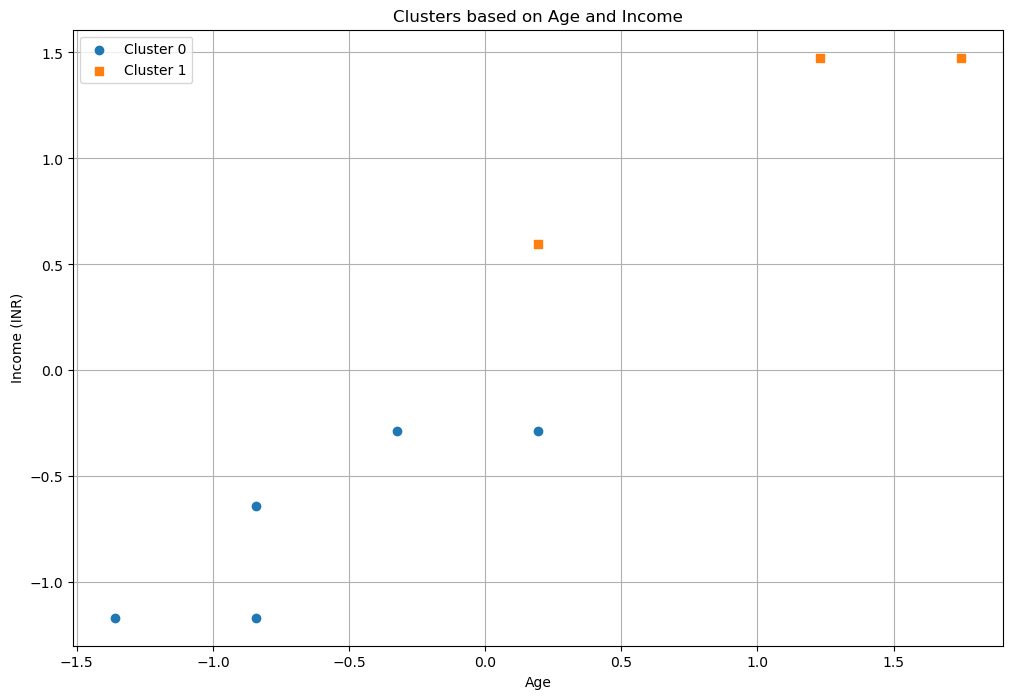

In [19]:
import matplotlib.pyplot as plt
import pandas as pd


# Extracting relevant columns for visualization
features = df[['Age', 'Income (INR) (in lakhs per annum)', 'Demography', 'Gender', 'Cluster']]

# Create separate DataFrames for each cluster
cluster_0 = features[features['Cluster'] == 0]
cluster_1 = features[features['Cluster'] == 1]

# Plotting the clusters
plt.figure(figsize=(12, 8))

# Scatter plot for Cluster 0
plt.scatter(cluster_0['Age'], cluster_0['Income (INR) (in lakhs per annum)'], label='Cluster 0', marker='o')

# Scatter plot for Cluster 1
plt.scatter(cluster_1['Age'], cluster_1['Income (INR) (in lakhs per annum)'], label='Cluster 1', marker='s')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Income (INR)')
plt.title('Clusters based on Age and Income')
plt.legend()
plt.grid(True)
plt.show()

# 8. Interpretation  

Cluster 0 appears to have customers with lower income and younger age, mostly from rural areas.

Cluster 1 includes customers with higher income and older age, mostly from urban areas as seem from the graph above.


# 9. Recommendation

Cluster 0:

Lower Age, Lower Income, Predominantly from Rural Areas, Mostly Male

- Offer straightforward and easily accessible banking services tailored to the needs of younger and less affluent customers.
- Provide educational materials or workshops on financial literacy to empower customers in managing their finances.
- Focus on user-friendly digital banking solutions as younger customers may be more tech-savvy.
- Introduce mobile apps and online banking features to enhance convenience.


Cluster 1:

Characteristics:
Higher Age, Higher Income, Predominantly from Urban Areas, Mostly Female

Recommendations:

- Provide personalized investment advisory services for wealth management.
- Offer a range of investment products suited to different risk appetites.
- Introduce premium banking services with exclusive benefits for high-income customers.
- Offer personalized support and priority services.
- Develop tailored loan products such as mortgage or personal loans with favorable terms for this segment and consider offering credit cards with exclusive perks.